In [13]:
## Imports
import ROOT as rt
import csv
import re
import sys
import collections
from collections import OrderedDict
import uproot
import numpy as np
import time
import numba
from numba import jit
from matplotlib import pyplot as plt
from numpy import linalg as LA
from ROOT import TLorentzVector
from array import array
# import PyTEX
import os

import math

sys.path.append('/storage/user/jmao/gpu/jmao/cms-llp/delayed_jet_analyzer/lib/')

from histo_utilities import create_TH1D, create_TH2D, create_TGraph,std_color_list

import CMS_lumi, tdrstyle
tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 1
CMS_lumi.extraText = "     Simulation Preliminary"

from itertools import chain 


print(sys.version)


3.6.8 (default, Aug  7 2019, 17:28:10) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-39)]


In [14]:
## Inputs
##Pedestal
# Ped = list(range(5,21,5))
# Ped = list(range(5,36,5))
Ped = list(range(25,26,5))
print(Ped)
##Na22
# Na22 = list(range(5,21,5))
Na22 = list(range(25,29,5))
print(Na22)

[25]
[25]


In [20]:
#labels
tags = []

# file names
fnames = {}

time = 180
# time = 600

for x in Ped:
    tag_th = 'th10_'+str(x)+'_5'
    ped_th = 'ped_'+tag_th
    fnames[ped_th] = 'sipm_ped_module_'+tag_th+'_time'+str(time)+'.root'
    tags.append(ped_th)
    
for x in Na22:
    tag_th = 'th10_'+str(x)+'_5'
    na22_th = 'na22_'+tag_th
    fnames[na22_th] = 'sipm_na22_module_'+tag_th+'_time'+str(time)+'.root'
    tags.append(na22_th)
    
print(tags)

['ped_th10_25_5', 'na22_th10_25_5']


In [21]:
# directory
home_dir = '/storage/user/christiw/login-1/christiw/cptlab/tofpet_data/sipm_source/20200302/'
# home_dir = '/storage/user/christiw/login-1/christiw/cptlab/tofpet_data/sipm_source/20200303/'

# output plots directory
out_dir = '/storage/user/jmao/gpu/jmao/mtd_cpt/plots/20200303/'
# out_dir = '/storage/user/jmao/gpu/jmao/mtd_cpt/plots/20200304/'


# get all the trees
tree = OrderedDict()

for tag in tags:
    print(home_dir+fnames[tag])

    root_dir = uproot.open(home_dir+fnames[tag])
    tree[tag] = root_dir['data']

    print(tag)
    v = tree[tag]
    e = v['energy'].array()
    print('energy: ', e[:1])
 

/storage/user/christiw/login-1/christiw/cptlab/tofpet_data/sipm_source/20200302/sipm_ped_module_th10_25_5_time180.root
ped_th10_25_5
energy:  [4.358597]
/storage/user/christiw/login-1/christiw/cptlab/tofpet_data/sipm_source/20200302/sipm_na22_module_th10_25_5_time180.root
na22_th10_25_5
energy:  [6.1746826]


In [22]:
qfine = {}
energy = {}
tot = {}

ch=50

for k,v in tree.items():
    print(k,v)

    # branches
    qfine_br = v['qfine'].array() 
    e_br = v['energy'].array() 
    tot_br = v['tot'].array()
    
    tot_br = v['tot'].array() 
    chID_br = v['tot'].array() 
    
#     qfine[k] = qfine_br[chID_br==ch]
#     energy[k] = e_br[chID_br==ch]
#     tot[k] = tot_br[chID_br==ch]
 
    qfine[k] = qfine_br 
    energy[k] = e_br 
    tot[k] = tot_br 
 

ped_th10_25_5 <TTree b'data' at 0x7f59be92ca58>
na22_th10_25_5 <TTree b'data' at 0x7f598e5c9710>


25 can plot
[ 75. 128.  91. 116.  99. 159. 184. 150. 137. 170.]
[179. 169. 101. 100. 161.  54. 109. 124. 179. 132.]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/mtd_cpt/plots/20200304/qfine_th10_25_5.png has been created


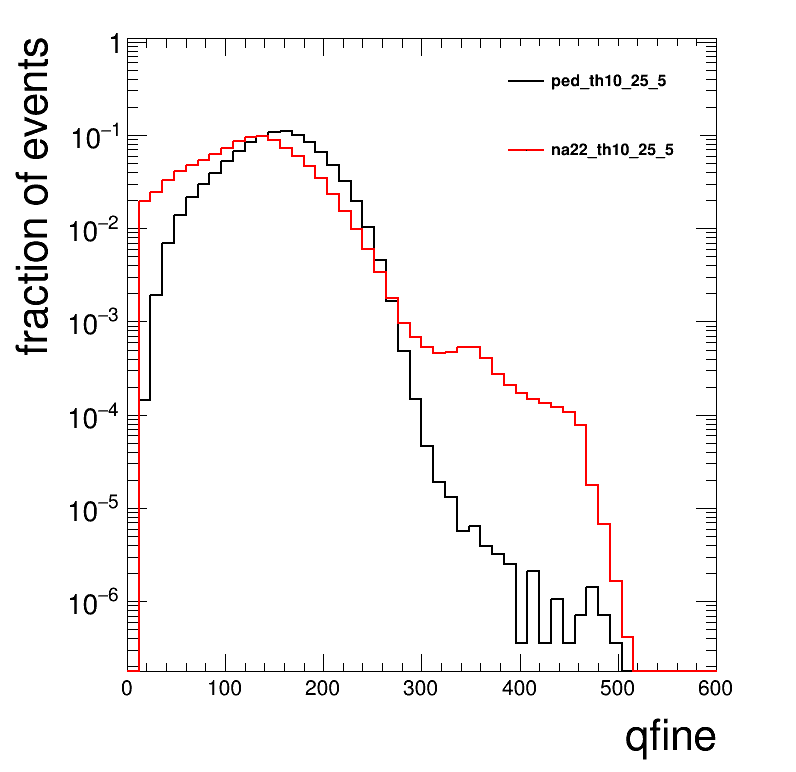

In [12]:
## PLOT


ht1 = {}
ht2 = {}

for x in Ped:
    i = 0
    tag_th = 'th10_'+str(x)+'_5'
    ped_th = 'ped_'+tag_th
    na22_th = 'na22_'+tag_th
    if tree[ped_th] and tree[na22_th]:
        print(x, 'can plot')
        
        c = rt.TCanvas('c','c', 800, 800)
        leg = rt.TLegend(0.63,0.76,0.88,0.94)
        leg.SetTextSize(0.022)
        leg.SetBorderSize(0)
        leg.SetEntrySeparation(0.01)


        x1 = qfine[ped_th]

        print(x1[:10])

        ht1[ped_th] = create_TH1D( x1, axis_title=['qfine', 'fraction of events'], name="", binning=[50,-0,600] )
        ht1[ped_th].SetLineColor(i+1)
        ht1[ped_th].GetXaxis().SetLabelSize(0.03)
        ht1[ped_th].GetYaxis().SetLabelSize(0.04)
        ht1[ped_th].SetMaximum(1e+1*(ht1[ped_th].GetMaximum()))

        ht1[ped_th].DrawNormalized('Histsame')

        leg.AddEntry(ht1[ped_th], ped_th)

        i += 1
        
        x2 = qfine[na22_th]

        print(x2[:10])

        ht2[na22_th] = create_TH1D( x2, axis_title=['qfine', 'fraction of events'], name="", binning=[50,-0,600] )
        ht2[na22_th].SetLineColor(i+1)
        ht2[na22_th].GetXaxis().SetLabelSize(0.03)
        ht2[na22_th].GetYaxis().SetLabelSize(0.04)
        ht2[na22_th].SetMaximum(1e+1*(ht2[na22_th].GetMaximum()))

        ht2[na22_th].DrawNormalized('Histsame')

        leg.AddEntry(ht2[na22_th], na22_th)

        i += 1
        
 


        leg.Draw()

        c.SetLogy()
        c.SetRightMargin(0.1)
        c.Update()
        c.Draw()
        c.SaveAs(out_dir+'qfine_'+tag_th+'.png')


25 can plot
[4.358597  2.1794128 1.9579163 3.4226418 5.2517395 1.5031509 2.1436653
 4.667286  4.055004  1.7895546]
[6.1746826 5.861431  5.103073  4.676159  2.976822  3.3070526 3.8520775
 3.6227188 4.4734726 3.1839752]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/mtd_cpt/plots/20200303/energy_th10_25_5.png has been created


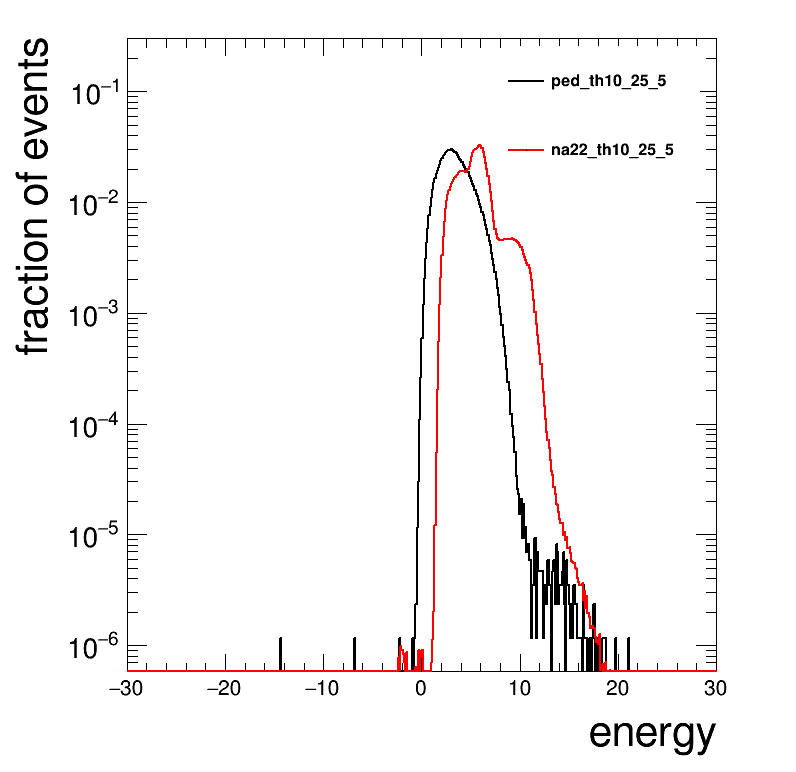

In [24]:
## PLOT


ht1 = {}
ht2 = {}

for x in Ped:
    i=0
    tag_th = 'th10_'+str(x)+'_5'
    ped_th = 'ped_'+tag_th
    na22_th = 'na22_'+tag_th
    if tree[ped_th] and tree[na22_th]:
        print(x, 'can plot')
        
        c = rt.TCanvas('c','c', 800, 800)
        leg = rt.TLegend(0.63,0.76,0.88,0.94)
        leg.SetTextSize(0.022)
        leg.SetBorderSize(0)
        leg.SetEntrySeparation(0.01)


        x1 = energy[ped_th]

        print(x1[:10])

        ht1[ped_th] = create_TH1D( x1, axis_title=['energy', 'fraction of events'], name="", binning=[500,-30,30] )
        ht1[ped_th].SetLineColor(i+1)
        ht1[ped_th].GetXaxis().SetLabelSize(0.03)
        ht1[ped_th].GetYaxis().SetLabelSize(0.04)
        ht1[ped_th].SetMaximum(1e+1*(ht1[ped_th].GetMaximum()))

        ht1[ped_th].DrawNormalized('Histsame')

        leg.AddEntry(ht1[ped_th], ped_th)

        i += 1
        
        x2 = energy[na22_th]

        print(x2[:10])

        ht2[na22_th] = create_TH1D( x2, axis_title=['energy', 'fraction of events'], name="", binning=[500,-30,30] )
        ht2[na22_th].SetLineColor(i+1)
        ht2[na22_th].GetXaxis().SetLabelSize(0.03)
        ht2[na22_th].GetYaxis().SetLabelSize(0.04)
        ht2[na22_th].SetMaximum(1e+1*(ht2[na22_th].GetMaximum()))

        ht2[na22_th].DrawNormalized('Histsame')

        leg.AddEntry(ht2[na22_th], na22_th)

        i += 1
        
 


        leg.Draw()

        c.SetLogy()
        c.SetRightMargin(0.1)
        c.Update()
        c.Draw()
#         c.SaveAs(out_dir+'energy_'+tag_th+'_above0.png')
        c.SaveAs(out_dir+'energy_'+tag_th+'.png')


25 can plot
[250666.97 278138.7  238027.42 277041.25 271580.   312057.8  293550.4
 268094.75 275499.84 338358.  ]
[297406.25 287403.75 281492.97 301700.12 299681.47 253950.33 281594.03
 290700.84 300783.06 313388.72]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/mtd_cpt/plots/20200304/tot_th10_25_5.png has been created


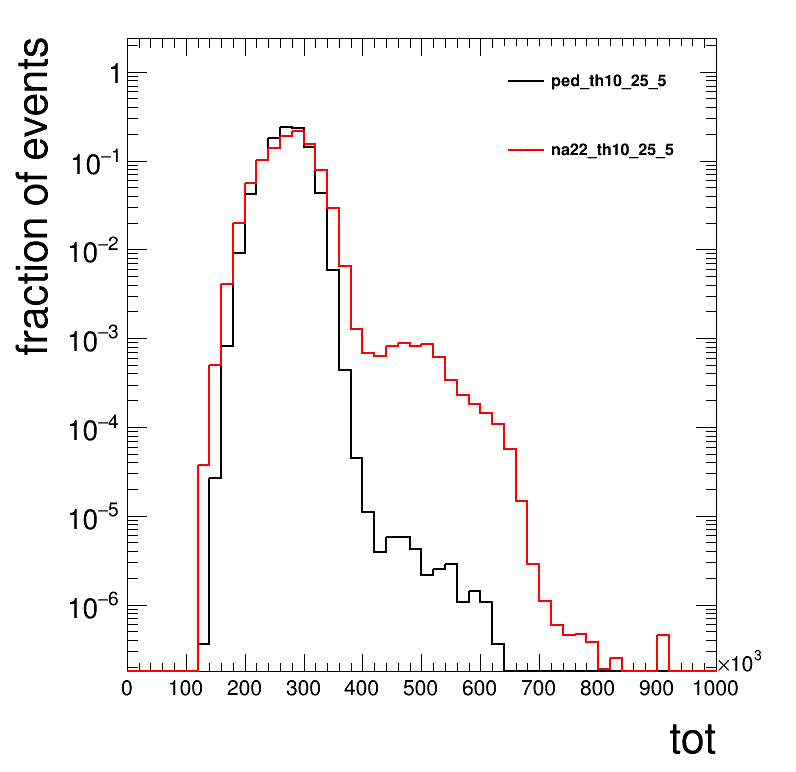

In [9]:
## PLOT


ht1 = {}
ht2 = {}

for x in Ped:
    i=0
    tag_th = 'th10_'+str(x)+'_5'
    ped_th = 'ped_'+tag_th
    na22_th = 'na22_'+tag_th
    if tree[ped_th] and tree[na22_th]:
        print(x, 'can plot')
        
        c = rt.TCanvas('c','c', 800, 800)
        leg = rt.TLegend(0.63,0.76,0.88,0.94)
        leg.SetTextSize(0.022)
        leg.SetBorderSize(0)
        leg.SetEntrySeparation(0.01)


        x1 = tot[ped_th]

        print(x1[:10])

        ht1[ped_th] = create_TH1D( x1, axis_title=['tot', 'fraction of events'], name="", binning=[50,-0,1e+06] )
        ht1[ped_th].SetLineColor(i+1)
        ht1[ped_th].GetXaxis().SetLabelSize(0.03)
        ht1[ped_th].GetYaxis().SetLabelSize(0.04)
        ht1[ped_th].SetMaximum(1e+1*(ht1[ped_th].GetMaximum()))

        ht1[ped_th].DrawNormalized('Histsame')

        leg.AddEntry(ht1[ped_th], ped_th)

        i += 1
        
        x2 = tot[na22_th]

        print(x2[:10])

        ht2[na22_th] = create_TH1D( x2, axis_title=['tot', 'fraction of events'], name="", binning=[50,-0,1e+06] )
        ht2[na22_th].SetLineColor(i+1)
        ht2[na22_th].GetXaxis().SetLabelSize(0.03)
        ht2[na22_th].GetYaxis().SetLabelSize(0.04)
        ht2[na22_th].SetMaximum(1e+1*(ht2[na22_th].GetMaximum()))

        ht2[na22_th].DrawNormalized('Histsame')

        leg.AddEntry(ht2[na22_th], na22_th)

        i += 1
        
 


        leg.Draw()

        c.SetLogy()
        c.SetRightMargin(0.1)
        c.Update()
        c.Draw()
        c.SaveAs(out_dir+'tot_'+tag_th+'.png')


ped_th10_25_5 <TTree b'data' at 0x7f78b3aadac8>
[ 75. 128.  91. 116.  99. 159. 184. 150. 137. 170.]
na22_th10_25_5 <TTree b'data' at 0x7f78adaf5470>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/mtd_cpt/plots/20200304/qfine_ped.png has been created


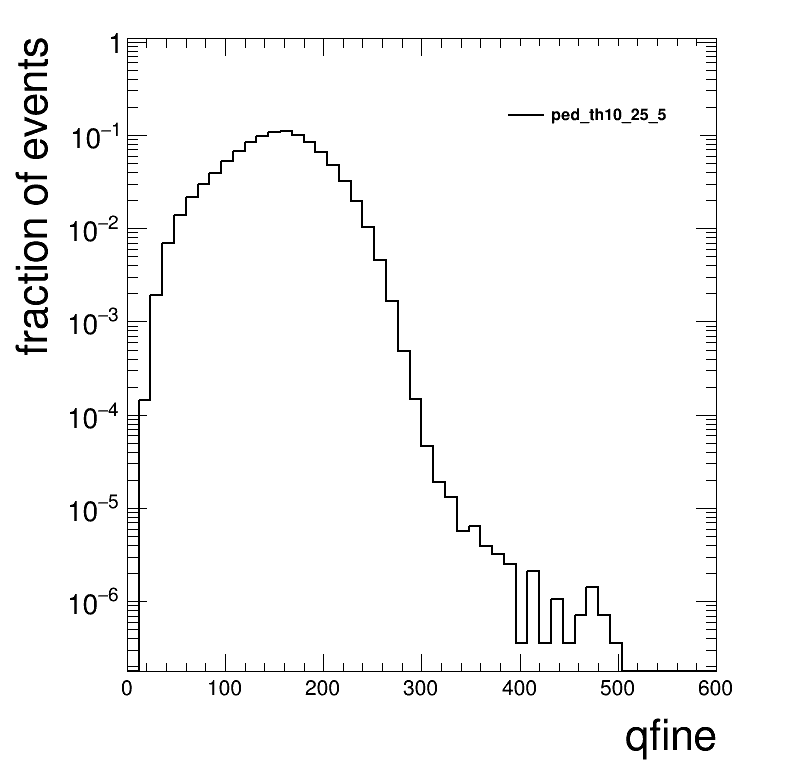

In [10]:
## PLOT
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.63,0.76,0.88,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)


i = 0
ht = {}


for k,v in tree.items(): 

    print(k,v)
    if 'ped' in k:
#     if 'na22' in k:
        
        j_gamma_all = qfine[k]

        print(j_gamma_all[:10])

        ht[k] = create_TH1D( j_gamma_all, axis_title=['qfine', 'fraction of events'], name="", binning=[50,-0,600] )
        ht[k].SetLineColor(i+1)
        ht[k].GetXaxis().SetLabelSize(0.03)
        ht[k].GetYaxis().SetLabelSize(0.04)
        ht[k].SetMaximum(1e+1*(ht[k].GetMaximum()))

    #     ht[k].Draw('Histsame')
        ht[k].DrawNormalized('Histsame')

        leg.AddEntry(ht[k], k)

        i += 1


leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'qfine_ped.png')
# c.SaveAs(out_dir+'qfine_na22.png')


ped_th10_25_5 <TTree b'data' at 0x7f78b3aadac8>
na22_th10_25_5 <TTree b'data' at 0x7f78adaf5470>
[179. 169. 101. 100. 161.  54. 109. 124. 179. 132.]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/mtd_cpt/plots/20200304/qfine_na22.png has been created


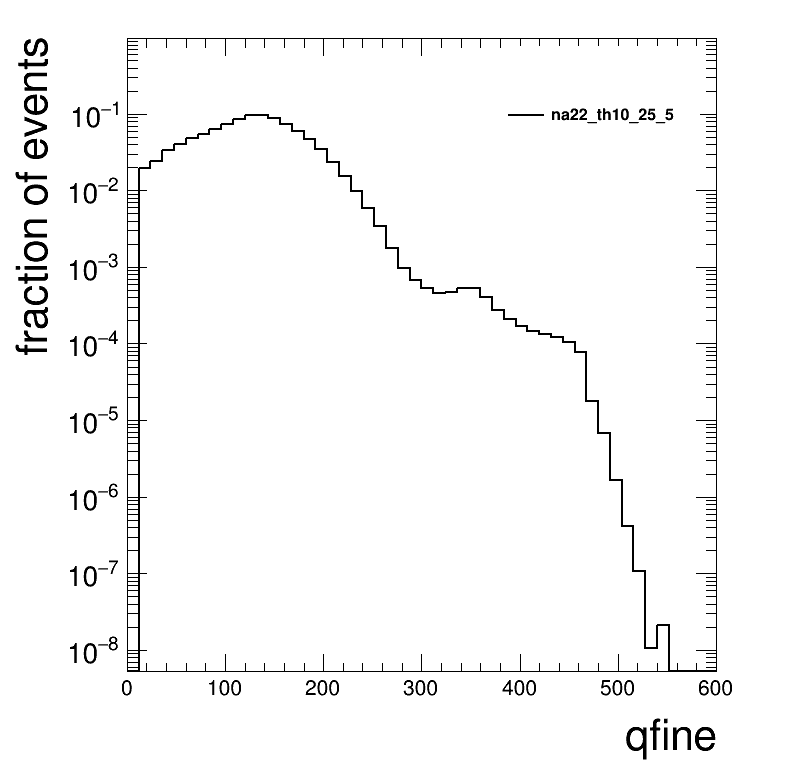

In [11]:
## PLOT
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.63,0.76,0.88,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)


i = 0
ht = {}


for k,v in tree.items(): 

    print(k,v)
#     if 'ped' in k:
    if 'na22' in k:
        
        j_gamma_all = qfine[k]

        print(j_gamma_all[:10])

        ht[k] = create_TH1D( j_gamma_all, axis_title=['qfine', 'fraction of events'], name="", binning=[50,-0,600] )
        ht[k].SetLineColor(i+1)
        ht[k].GetXaxis().SetLabelSize(0.03)
        ht[k].GetYaxis().SetLabelSize(0.04)
        ht[k].SetMaximum(1e+1*(ht[k].GetMaximum()))

    #     ht[k].Draw('Histsame')
        ht[k].DrawNormalized('Histsame')

        leg.AddEntry(ht[k], k)

        i += 1


leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
# c.SaveAs(out_dir+'qfine_ped.png')
c.SaveAs(out_dir+'qfine_na22.png')


ped_th10_25_5 <TTree b'data' at 0x7f78b3aadac8>
[250666.97 278138.7  238027.42 277041.25 271580.   312057.8  293550.4
 268094.75 275499.84 338358.  ]
na22_th10_25_5 <TTree b'data' at 0x7f78adaf5470>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/mtd_cpt/plots/20200304/tot_ped.png has been created


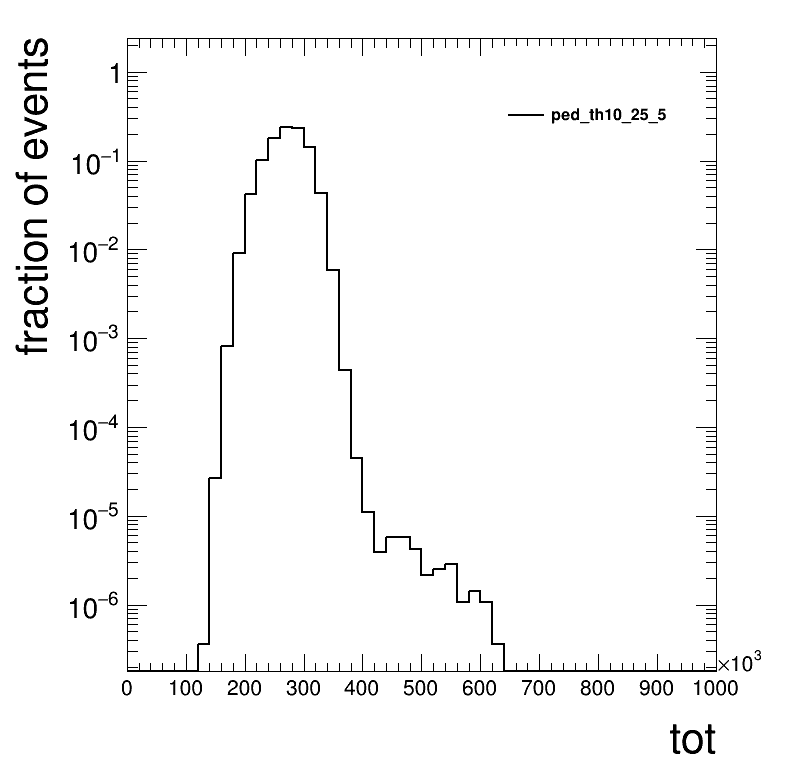

In [12]:
## PLOT
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.63,0.76,0.88,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)


i = 0
ht = {}


for k,v in tree.items(): 
    print(k,v)
    if 'ped' in k:
        j_gamma_all = tot[k]

        print(j_gamma_all[:10])

        ht[k] = create_TH1D( j_gamma_all, axis_title=['tot', 'fraction of events'], name="", binning=[50,-0,1e+6] )
        ht[k].SetLineColor(i+1)
        ht[k].GetXaxis().SetLabelSize(0.03)
        ht[k].GetYaxis().SetLabelSize(0.04)
        ht[k].SetMaximum(1e+1*(ht[k].GetMaximum()))

    #     ht[k].Draw('Histsame')
        ht[k].DrawNormalized('Histsame')

        leg.AddEntry(ht[k], k)

        i += 1


leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'tot_ped.png')


ped_th10_25_5 <TTree b'data' at 0x7f78b3aadac8>
na22_th10_25_5 <TTree b'data' at 0x7f78adaf5470>
[297406.25 287403.75 281492.97 301700.12 299681.47 253950.33 281594.03
 290700.84 300783.06 313388.72]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/mtd_cpt/plots/20200304/tot_na22.png has been created


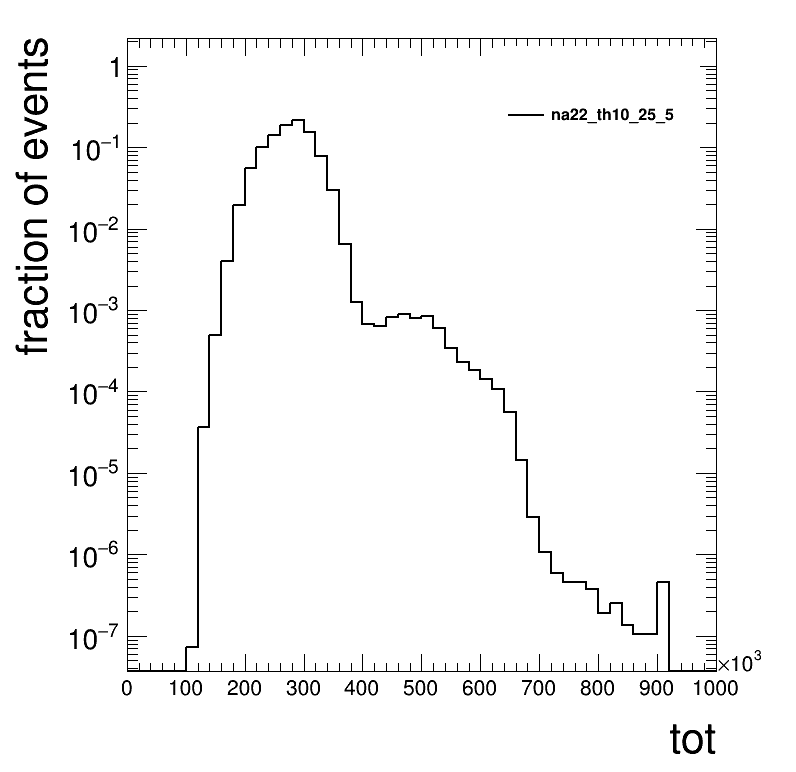

In [13]:
## PLOT
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.63,0.76,0.88,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)


i = 0
ht = {}


for k,v in tree.items(): 
    print(k,v)
    if 'na22' in k:
        j_gamma_all = tot[k]

        print(j_gamma_all[:10])

        ht[k] = create_TH1D( j_gamma_all, axis_title=['tot', 'fraction of events'], name="", binning=[50,-0,1e+6] )
        ht[k].SetLineColor(i+1)
        ht[k].GetXaxis().SetLabelSize(0.03)
        ht[k].GetYaxis().SetLabelSize(0.04)
        ht[k].SetMaximum(1e+1*(ht[k].GetMaximum()))

    #     ht[k].Draw('Histsame')
        ht[k].DrawNormalized('Histsame')

        leg.AddEntry(ht[k], k)

        i += 1


leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'tot_na22.png')


ped_th10_25_5 <TTree b'data' at 0x7f78b3aadac8>
na22_th10_25_5 <TTree b'data' at 0x7f78adaf5470>
[ 0.41986847 -1.3189964  -4.1699677  -4.9243965  -5.105835   -6.8735046
 -2.4521027  -3.3355827   1.5147324  -4.4843636 ]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/mtd_cpt/plots/20200304/energy_na22.png has been created


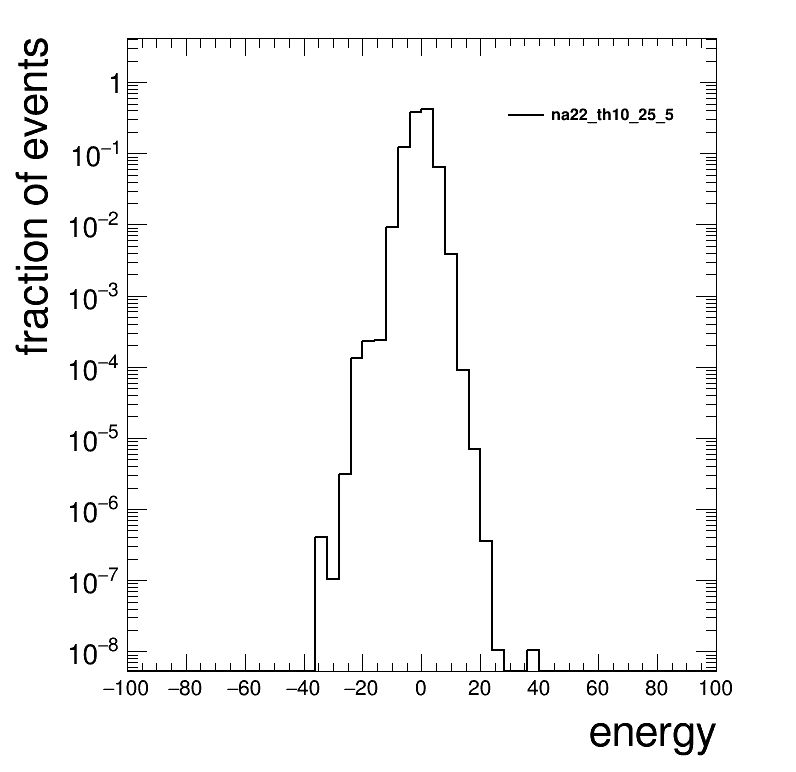

In [14]:
## PLOT
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.63,0.76,0.88,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)


i = 0
ht = {}


for k,v in tree.items(): 
    print(k,v)
    if 'na22' in k:
        j_gamma_all = energy[k]

        print(j_gamma_all[:10])

        ht[k] = create_TH1D( j_gamma_all, axis_title=['energy', 'fraction of events'], name="", binning=[50,-100,100] )
        ht[k].SetLineColor(i+1)
        ht[k].GetXaxis().SetLabelSize(0.03)
        ht[k].GetYaxis().SetLabelSize(0.04)
        ht[k].SetMaximum(1e+1*(ht[k].GetMaximum()))

    #     ht[k].Draw('Histsame')
        ht[k].DrawNormalized('Histsame')

        leg.AddEntry(ht[k], k)

        i += 1


leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'energy_na22.png')


ped_th10_25_5 <TTree b'data' at 0x7f78b3aadac8>
[-0.10378647  0.37808228 -1.6534348   0.9970474   0.67287064  1.3966331
 -0.3448906   0.07508087 -0.7247963   2.3356094 ]
na22_th10_25_5 <TTree b'data' at 0x7f78adaf5470>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/mtd_cpt/plots/20200304/energy_ped.png has been created


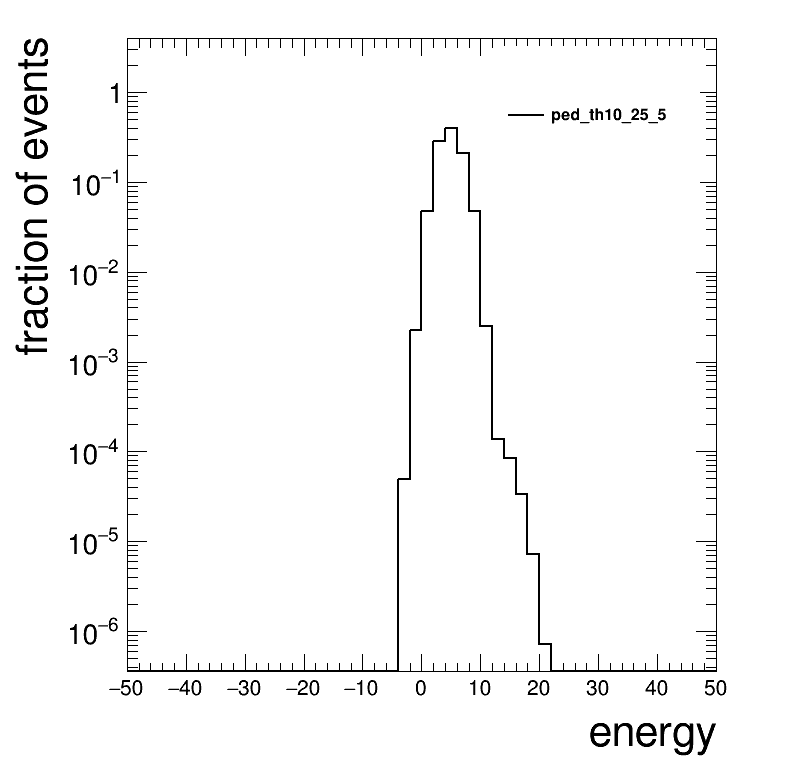

In [15]:
## PLOT
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.63,0.76,0.88,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)


i = 0
ht = {}


for k,v in tree.items(): 
    print(k,v)
    if 'ped' in  k:
        j_gamma_all = energy[k]

        print(j_gamma_all[:10])

        ht[k] = create_TH1D( j_gamma_all, axis_title=['energy', 'fraction of events'], name="", binning=[50,-50,50] )
        ht[k].SetLineColor(i+1)
        ht[k].GetXaxis().SetLabelSize(0.03)
        ht[k].GetYaxis().SetLabelSize(0.04)
        ht[k].SetMaximum(1e+1*(ht[k].GetMaximum()))

    #     ht[k].Draw('Histsame')
        ht[k].DrawNormalized('Histsame')

        leg.AddEntry(ht[k], k)

        i += 1


leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'energy_ped.png')
